In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('check.data',delim_whitespace=True,header=None)

In [4]:
df.head()

,0,1,2,3,4,5
0,1,3,5,7,8,9
1,2,5,7,11,15,17


In [5]:
col_name=['s1','s2','s3','s4','s5','s6']

In [6]:
df.columns=col_name

In [7]:
print(df.columns)

Index(['s1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


In [8]:
df.head()

,s1,s2,s3,s4,s5,s6
0,1,3,5,7,8,9
1,2,5,7,11,15,17


In [9]:
df.describe()

,s1,s2,s3,s4,s5,s6
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,1.500000,4.000000,6.000000,9.000000,11.500000,13.000000
std,0.707107,1.414214,1.414214,2.828427,4.949747,5.656854
min,1.000000,3.000000,5.000000,7.000000,8.000000,9.000000
25%,1.250000,3.500000,5.500000,8.000000,9.750000,11.000000
50%,1.500000,4.000000,6.000000,9.000000,11.500000,13.000000
75%,1.750000,4.500000,6.500000,10.000000,13.250000,15.000000
max,2.000000,5.000000,7.000000,11.000000,15.000000,17.000000


In [10]:
import matplotlib.pyplot as plt

In [11]:
import seaborn as sns

In [12]:
col_study=['s1','s2']

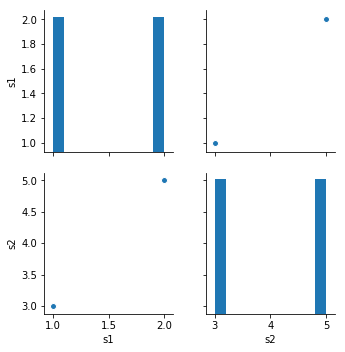

In [13]:
sns.pairplot(df[col_study],size=2.5)

In [14]:
pd.options.display.float_format = '{:,.4f}'.format

In [15]:
df.corr()

,s1,s2,s3,s4,s5,s6
s1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
s2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
s3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
s4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
s5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
s6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [16]:
plt.figure(figsize=(16,10))

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

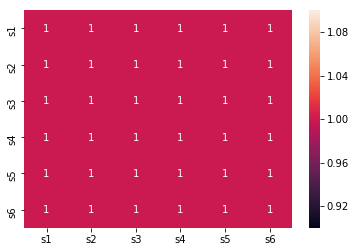

In [17]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [18]:
df.head()

,s1,s2,s3,s4,s5,s6
0,1,3,5,7,8,9
1,2,5,7,11,15,17


In [19]:
X=df['s1'].values.reshape(-1,1)

In [20]:
y=df['s2'].values

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model=LinearRegression()

In [23]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
model.coef_

array([2.])

In [25]:
model.intercept_

1.0000000000000009

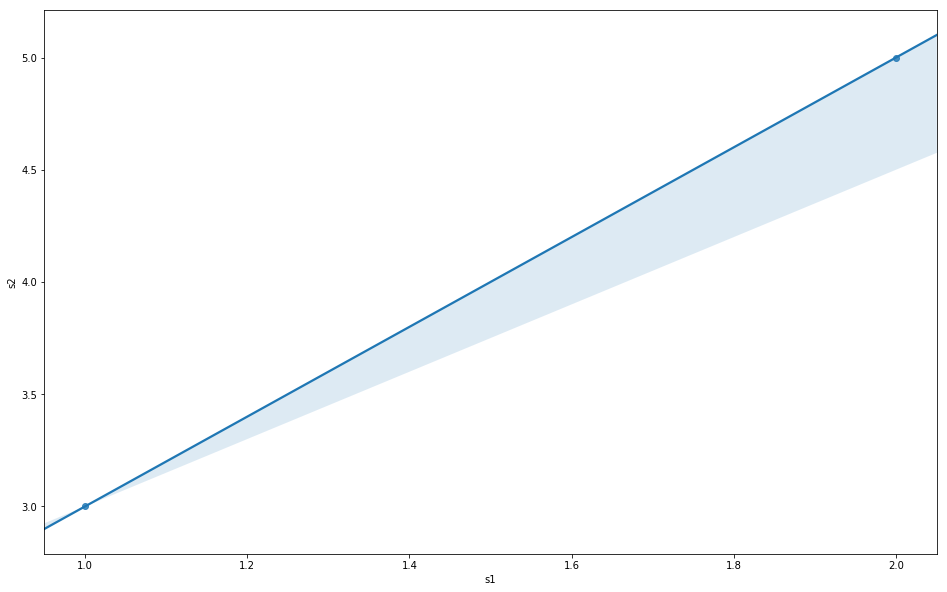

In [26]:
plt.figure(figsize=(16,10))
sns.regplot(X,y);
plt.xlabel('s1');
plt.ylabel('s2');
plt.show()


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X=df['s1'].values.reshape(-1,1)

In [29]:
y=df['s2'].values

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [31]:
lr=LinearRegression()

In [32]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
y_train_pred=lr.predict(X_train)


[3.]


In [42]:
y_test_pred=lr.predict(X_test)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

print(y_test_pred)
print(y_train_pred)



[[1]]
[[2]]
[3]
[5]
[3.]
[3.]


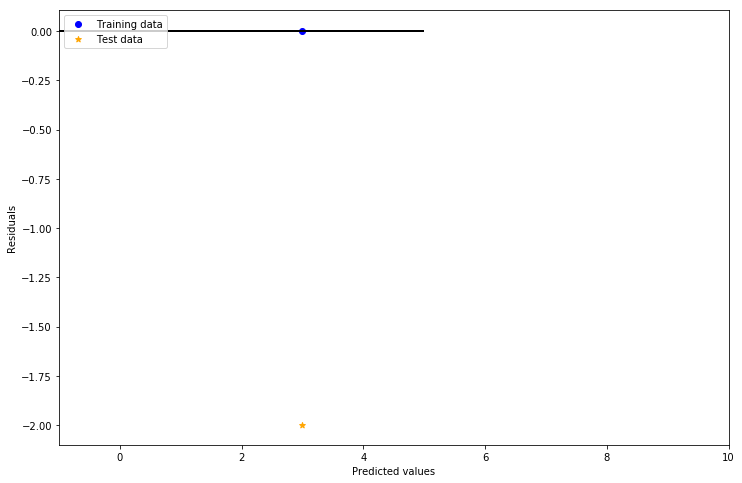

In [44]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-1, xmax=5, lw=2, color='k')
plt.xlim([-1, 10])
plt.show()

In [130]:
from sklearn.metrics import mean_squared_error

In [131]:
mean_squared_error(y_train,y_train_pred)

0.0

In [132]:
mean_squared_error(y_test, y_test_pred)

4.0

In [137]:
from sklearn.metrics import r2_score

In [138]:
r2_score(y_train,y_train_pred)#1-(total sum of residual)/(total sum of sq) = 1-(3-3)^2/(quantity 2)^2 = 1-0/4 = 1


1.0

In [139]:
r2_score(y_test,y_test_pred) #1-(total sum of residual)/(total sum of sq) = 1-(5-3)^2/(quantity 2)^2 = 1-4/4 = 0

0.0

In [45]:
#Backend Implementation